# Visualising weather observations

The data for comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

I have downloaded NCEI daily Air Temperature observations for Moscow, Russia for 2005 - 2015 period.

Each row in the datafile "moscow_2005_2015_meteo.csv" corresponds to a single observation.

The following variables are provided:

* **STATION** : station identification code
* **NAME**: station name
* **LATITUDE**: station location
* **LONGITUDE**: station location
* **ELEVATION**: station elevation above the sea in meters
* **DATE** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **TMAX** : Maximum daily temperature, Celcium degrees
* **TMIN** : Minimum daily temperature, Celcium degrees

The data visualisation is the following:

* A line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures is shaded.
* Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

In [1]:
# Import libraries and plot station on a map

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

df = pd.read_csv('data/ghcnd-stations.txt', header=None)
df = df.rename(columns={1: 'LATITUDE', 2: 'LONGITUDE'})

lons = df['LONGITUDE'].tolist()
lats = df['LATITUDE'].tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
mplleaflet.display(fig=plt.gcf())

In [2]:
df = pd.read_csv('data/moscow_2005-2015_meteo.csv')
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TMAX,TMIN
0,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2005-01-01,1.1,-2.5
1,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2005-01-02,-0.2,-3.9
2,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2005-01-03,0.8,-1.6
3,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2005-01-04,0.6,-1.5
4,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2005-01-05,-0.3,-2.0


In [3]:
df['Date'] = pd.to_datetime(df['DATE'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Watch out for leap year
s_o = df.shape
df = df[~((df['Month']==2)&(df['Day']==29))]
s_r = df.shape
print('{} series of data removed'.format(s_o[0]-s_r[0]))

2 series of data removed


In [4]:
# Max and min data after grouping by each day:
max_0514 = df[df['Year'] < 2015].groupby(['Month', 'Day']).aggregate({'TMAX':np.max})
min_0514 = df[df['Year'] < 2015].groupby(['Month', 'Day']).aggregate({'TMIN':np.min})

max_2015 = df[df['Year']==2015].groupby(['Month', 'Day']).aggregate({'TMAX':np.max})
min_2015 = df[df['Year']==2015].groupby(['Month', 'Day']).aggregate({'TMIN':np.max})

broken_max = np.where(max_2015['TMAX'] > max_0514['TMAX'])[0]
broken_min = np.where(min_2015['TMIN'] < min_0514['TMIN'])[0]

Plotting the data

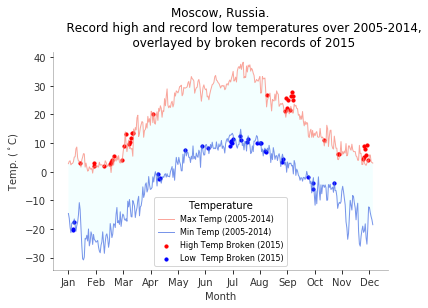

In [5]:
# The line chart for the high temperatures
plt.plot(max_0514['TMAX'].values, label='Max Temp (2005-2014)',
         linewidth=1, alpha=0.7, c='salmon')
# The line chart for the low temperatures
plt.plot(min_0514.values, label='Min Temp (2005-2014)',
         linewidth=1, alpha=0.7, c='royalblue')

# Add the azure shade between the 2 charts.
plt.gca().fill_between(range(len(max_0514)),
                       min_0514['TMIN'],
                       max_0514['TMAX'],
                       facecolor='azure', alpha=0.8)

# Scatter max and min records that were broken in 2015
plt.scatter(broken_max, max_2015.iloc[broken_max], s=10, color='red',
            label='High Temp Broken (2015)')
plt.scatter(broken_min, min_2015.iloc[broken_min], s=10, color='blue',
            label='Low  Temp Broken (2015)')

# Show the legend
plt.legend(loc='best', title='Temperature', fontsize=8)

# Tweak axis ticks and labels
plt.xticks(np.linspace(0, 30 + 30*11, num = 12), 
           (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec'),
           alpha=0.8)
plt.yticks(alpha=0.8 )
plt.xlabel('Month', alpha = 0.8)
plt.ylabel('Temp. ($^\circ$C)', alpha = 0.8)
plt.title("""Moscow, Russia.
            Record high and record low temperatures over 2005-2014,
            overlayed by broken records of 2015""")

# Dejunkify further
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['left'].set_alpha(0.3)

plt.show()